In [1]:
cd ..

C:\Users\Bob\Desktop\U\practicum\temp\vigilant-computing-machine\source


In [2]:
# 'vigilant-computing-machine/source/util.py'
import util
import evaluate

import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

import Orange
from Orange.distance import Euclidean
import orangecontrib.conformal as cp

# set NumPy seed for Orange3-Conformal reproducibility
np.random.seed(42)

In [3]:
# set pwd to root of repository
repo_root = 'C:/Users/Bob/Desktop/U/practicum/temp/vigilant-computing-machine/'
#repo_root = '/uufs/chpc.utah.edu/common/home/u0740821/conformal_prediction/vigilant-computing-machine'

os.chdir(repo_root)

In [4]:
# read in data
tab_random = util.read_csv_to_table('./data/random_with_header_for_orange.csv')
tab_signal = util.read_csv_to_table('./data/signal_with_header_for_orange.csv')
tab_missing = util.read_csv_to_table('./data/missing_with_header_for_orange.csv')
tab_imputed = util.read_csv_to_table('./data/imputed_with_header_for_orange.csv')

-----

-----

-----

# ADA

# Orange.modelling.ada_boost.SklAdaBoostClassificationLearner
# Orange.modelling.ada_boost.SklAdaBoostLearner
# Orange.modelling.SklAdaBoostLearner

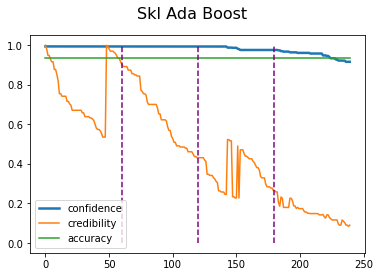

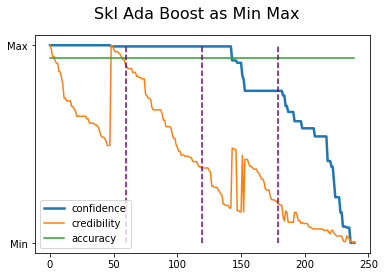

In [5]:
ad, ada_m = \
evaluate.make_graph_inductive_inverse_probability(
    Orange.modelling.SklAdaBoostLearner(),
    tab_signal,
    eps=0.05,
    mondrian=True)
print()

### Mondrian
----
----

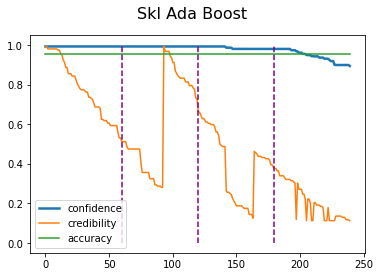

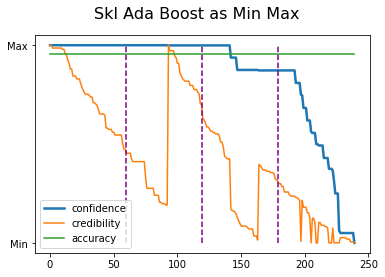

In [6]:
ad, ada_n = \
evaluate.make_graph_inductive_inverse_probability(
    Orange.modelling.SklAdaBoostLearner(),
    tab_signal,
    eps=0.05,
    mondrian=False)
print()

----

-----

-----

# KNN

# Orange.modelling.knn.KNNLearner
# Orange.modelling.KNNLearner

# Orange.classification.knn.KNNLearner
# Orange.classification.KNNLearner

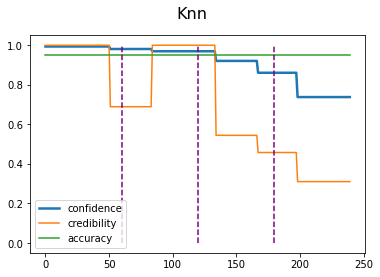

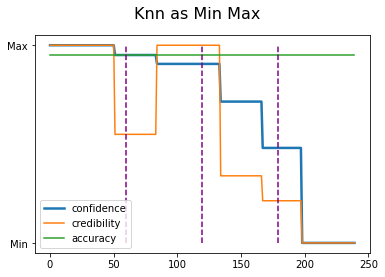

In [7]:
kn, knn_m = \
evaluate.make_graph_inductive_inverse_probability(
    Orange.classification.KNNLearner(),
    tab_signal,
    eps=0.05,
    mondrian=True)
print()

### Mondrian
----
----

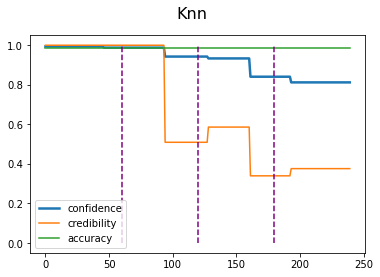

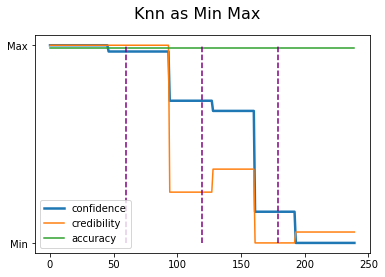

In [8]:
kn, knn_n = \
evaluate.make_graph_inductive_inverse_probability(
    Orange.classification.KNNLearner(),
    tab_signal,
    eps=0.05,
    mondrian=False)
print()

----

----

----

# Random Forest

# Orange.modelling.randomforest.RandomForestLearner
# Orange.modelling.RandomForestLearner
# Orange.modelling.randomforest.RFClassification

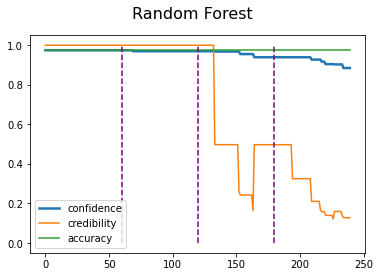

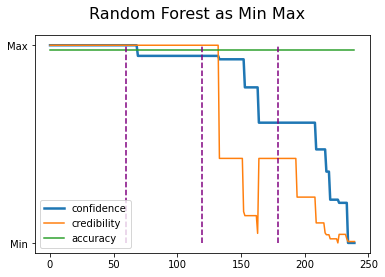

In [9]:
r, rf_m = \
evaluate.make_graph_inductive_inverse_probability(
    Orange.modelling.randomforest.RFClassification(),
    tab_signal,
    eps=0.05,
    mondrian=True)
print()

### Mondrian
----
----

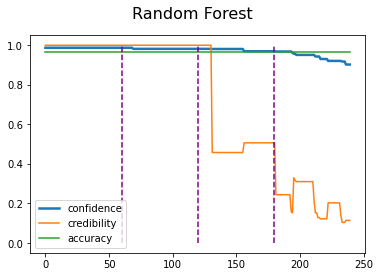

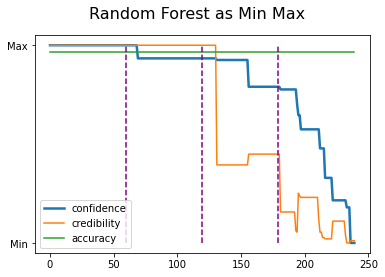

In [10]:
r, rf_n = \
evaluate.make_graph_inductive_inverse_probability(
    Orange.modelling.randomforest.RFClassification(),
    tab_signal,
    eps=0.05,
    mondrian=False)
print()

----

----

----

# Logistic Regression

# Orange.classification.LogisticRegressionLearner

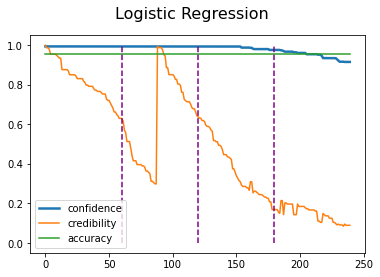

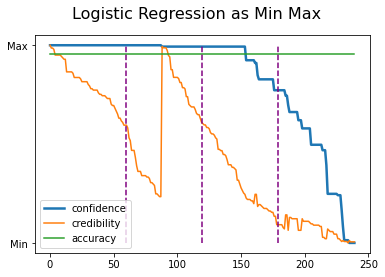

In [11]:
l, lr_m = \
evaluate.make_graph_inductive_inverse_probability(
    Orange.classification.LogisticRegressionLearner(),
    tab_signal,
    eps=0.05,
    mondrian=True)
print()

### Mondrian
----
----

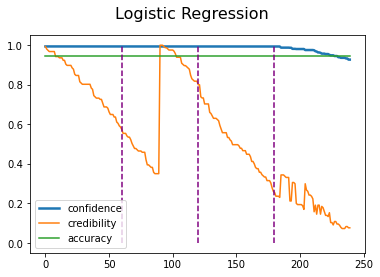

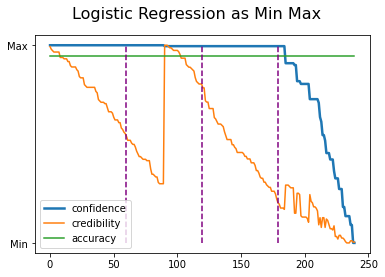

In [12]:
l, lr_n = \
evaluate.make_graph_inductive_inverse_probability(
    Orange.classification.LogisticRegressionLearner(),
    tab_signal,
    eps=0.05,
    mondrian=False)
print()

----

----

----

## Scaled

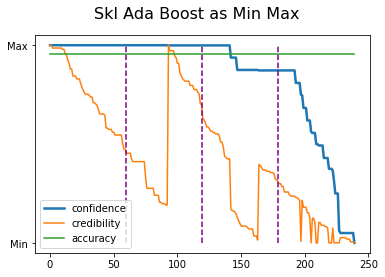

In [13]:
ada_n

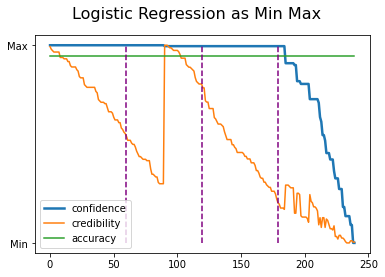

In [14]:
lr_n

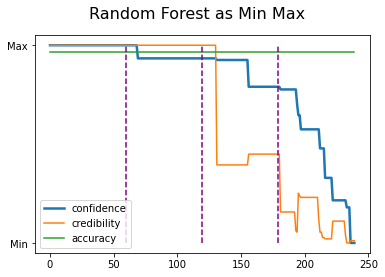

In [15]:
rf_n

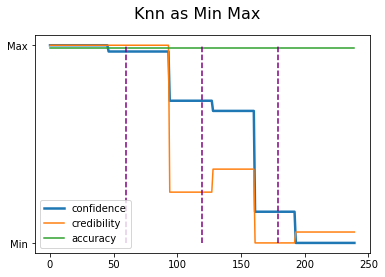

In [16]:
knn_n

----

----

----

## Mondrian Scaled

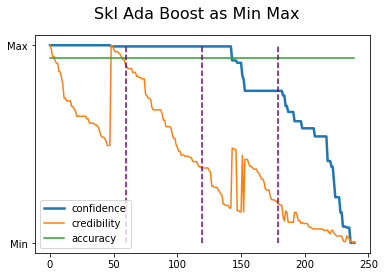

In [17]:
ada_m

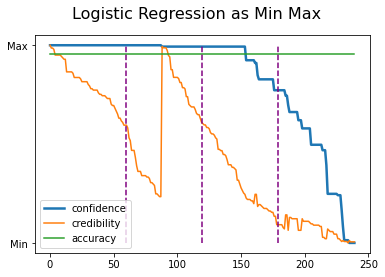

In [18]:
lr_m

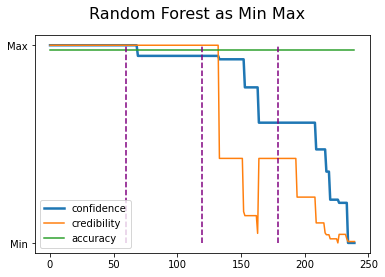

In [19]:
rf_m

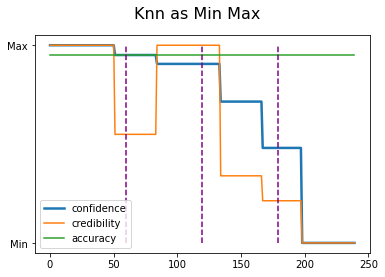

In [20]:
knn_m

----

----

----

In [21]:
print(sum(tab_signal.Y))
print(len(tab_signal.Y) - sum(tab_signal.Y))

599.0
601.0


We can see that our dataset does not exhibit class imbalance. 

In reality, it is unlikely that ~50% of the population develops breast cancer within their lifetime.

This makes one inclined to believe that if we repeat the above experiment, but first remove half of the cancer examples, that we would see further improvement in the accuracy (single) or further reduction in the loss of precision (multiple) of the (Label-Conditional) Mondrian Conformal Predictor

----

# Remove half the cancer examples and repeat the experiment

In [22]:
cancer = tab_signal[np.array(tab_signal.Y == 1)]
half = int(len(cancer)/2)
half_cancer = cancer[:half]
no_cancer = tab_signal[np.array(tab_signal.Y == 0)]
tab_half = Orange.data.Table.concatenate([half_cancer, no_cancer])
print(sum(tab_signal.Y==1), '/', len(tab_signal))
print(sum(tab_half.Y==1), '/', len(tab_half))

599 / 1200
299 / 900


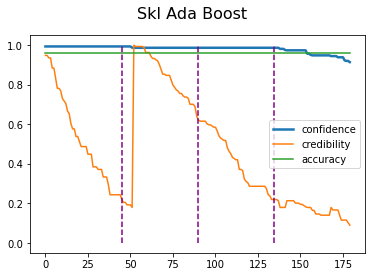

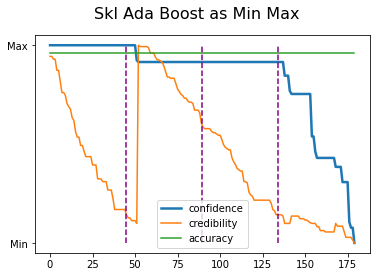

In [23]:
evaluate.make_graph_inductive_inverse_probability(
    Orange.modelling.SklAdaBoostLearner(),
    tab_half,
    eps=0.05,
    mondrian=False)
print()

----
----
### Mondrian

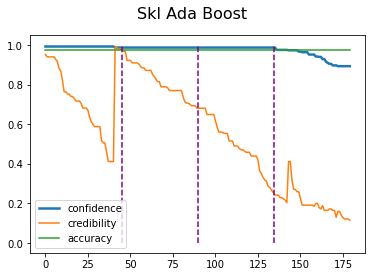

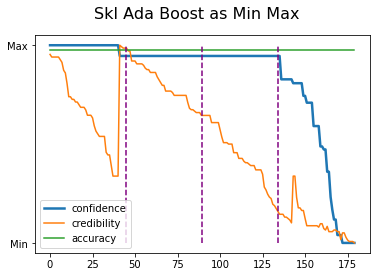

In [24]:
evaluate.make_graph_inductive_inverse_probability(
    Orange.modelling.SklAdaBoostLearner(),
    tab_half,
    eps=0.05,
    mondrian=True)
print()

# Observation:
### Mondrian did appear to improve accuracy when class imbalance present

----

----

----